<a href="https://colab.research.google.com/github/eeuuais/kaggle_comp/blob/main/(2_1)DataPreparation%26Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2nd level. Porto Seguro’s Safe Driver Prediction

- Porto Seguro는 브라질의 자동차 보험 회사입니다. 본 경진 대회의 목적은 어떤 차주가 내년에 보험 청구를 할 확률을 예측하는 겁니다.
- 테스트 데이터가 훈련 데이터보다 많습니다. 그리고 Null 값이 np.NaN이 아닌 -1로 되어있습니다. 또한, Feature가 무엇을 뜻하는지 제시하지 않았다는 것이 특징입니다. 보통은 특정 Feature가 무엇을 나타내는지 알려줍니다. 예를 들어 집 값을 예측하는 데이터에서 Feature 중 방 크기(Area)가 있습니다. 방 크기가 크면 집 값이 올라갈 것이라는 예상을 해볼 수 있습니다. 하지만 Porto Seguro 컴피티션에는 각 Feature가 무엇을 의미하는지 알 수 없습니다. 데이터를 안내한 부분에도 나와있지 않고, Feature의 이름으로 유추하기도 어렵습니다. 다만, Feature가 binary인지, categorical인지, oridnal인지, nominal인지만 구분할 수 있을 뿐입니다. 보안상 공개를 하지 않는 것 같습니다.
- target은 보험 청구를 한다(=1), 보험 청구를 하지 않는다(=0)인 binary 데이터입니다. 0과 1로 구성되어 있으며 0이 1보다 압도적으로 많습니다.

In [ ]:
# ModuleNotFoundError: No module named 'sklearn' 해결법(Colab)

!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 이전코드
# from sklearn.preprocessing import Imputer

# 수정코드
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

# 최대 열(columns) 수 설정
pd.set_option('display.max_columns', 100)

In [ ]:
# Loading data

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Porto Seguro는 브라질의 자동차 보험 회사입니다. 본 경진 대회의 목적은 어떤 차주가 내년에 보험 청구를 할 확률을 예측하는 겁니다.

데이터는 59만 개의 훈련 데이터와 89만 개의 테스트 데이터로 구성되어 있습니다. 테스트 데이터가 훈련 데이터보다 많습니다. 그리고 Null 값이 np.NaN이 아닌 -1로 되어있습니다. 또한, Feature가 무엇을 뜻하는지 제시하지 않았다는 것이 특징입니다. 보통은 특정 Feature가 무엇을 나타내는지 알려줍니다. 예를 들어 집 값을 예측하는 데이터에서 Feature 중 방 크기(Area)가 있습니다. 방 크기가 크면 집 값이 올라갈 것이라는 예상을 해볼 수 있습니다. 하지만 Porto Seguro 컴피티션에는 각 Feature가 무엇을 의미하는지 알 수 없습니다. 데이터를 안내한 부분에도 나와있지 않고, Feature의 이름으로 유추하기도 어렵습니다. 다만, Feature가 binary인지, categorical인지, oridnal인지, nominal인지만 구분할 수 있을 뿐입니다. 보안상 공개를 하지 않는 것 같습니다.

target은 보험 청구를 한다(=1), 보험 청구를 하지 않는다(=0)인 binary 데이터입니다. 0과 1로 구성되어 있으며 0이 1보다 압도적으로 많습니다.

In [ ]:
# Data at first sight

train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [ ]:
train.shape

(595212, 59)

In [ ]:
# 중복 행 확인 --> 없는 것으로 확인
train.drop_duplicates()
train.shape

(595212, 59)

In [ ]:
test.shape

(892816, 58)

- 테스트 세트에서 하나의 변수가 누락되었지만 이것이 타겟 변수입니다. 괜찮습니다.
이제 우리가 가지고 있는 각 유형의 변수 수를 조사해 보겠습니다.

따라서 나중에 14개의 범주형 변수에 대한 더미 변수를 만들 수 있습니다. 빈 변수는 이미 이진 변수이며 더미화가 필요하지 않습니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

다시 말하지만, info() 메서드를 사용하면 데이터 유형이 정수 또는 부동 소수점임을 알 수 있습니다. 데이터 세트에 null 값이 없습니다. 누락된 값이 -1로 대체되기 때문에 정상입니다. 나중에 살펴보겠습니다.

메타데이터
데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 DataFrame에 저장합니다. 이는 분석, 시각화, 모델링 등에 대한 특정 변수를 선택하려는 경우에 유용합니다.

구체적으로 다음을 저장합니다.

- 역할: 입력, ID, 대상
- 수준: 명목, 간격, 서수, 이진수
- 유지: 참 또는 거짓
- dtype: int, float, str

# Meta Data
- 본 커널의 특징은 데이터 관리를 위해 Meta Data를 만들어 활용했다는 점입니다. 각 feature들의 특징을 담은 Meta Data를 만들어 필요할 때마다 사용하는 것입니다. 어떤 조건의 feature만 사용하고 싶을 때 그때마다 코드를 작성하기 번거롭습니다. 편리성을 위해 Meta Data를 미리 만들어 놓고 간단한 코드로 원하는 feature를 가져올 수 있습니다.

In [ ]:
# Metadata

data = []
for f in train.columns :
  # Defining the role
  if f == 'target':
    role = 'target'
  elif f == 'id' :
    role = 'id'
  else:
    role = 'input'

  # Defining the level
  # 각 feature들의 type에 따라 level을 이진형, 명목형, 연속형, 순서형으로 정함
  if 'bin' in f or f == 'target':
    level = 'binary'
  elif 'cat' in f or f == 'id' :
    level = 'nominal'
  elif train[f].dtype == float :
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'

  # Initialize keep to True for all variables except for id
  keep = True
  if f == 'id':
    keep = False

  # Definig the data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname' : f, 
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [ ]:
# nominal 타입을 불러올 때

meta[(meta.level=='nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

아래는 role 및 level마다 변수의 수를 보여준다

In [ ]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,22
3,input,nominal,14
4,input,ordinal,4
5,target,binary,1


Descriptive statistics<br>
데이터 프레임에 describe 메서드를 적용할 수도 있습니다. 그러나 범주형 변수와 id 변수에 대한 평균, std, ...를 계산하는 것은 별 의미가 없습니다. 나중에 범주형 변수를 시각적으로 살펴보겠습니다.

메타 파일 덕분에 기술 통계를 계산할 변수를 쉽게 선택할 수 있습니다. 명확하게 하기 위해 데이터 유형별로 이 작업을 수행합니다.

In [ ]:
# Interval variables 
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


- reg 변수 : 
ps_reg_03에만 누락된 값이 있습니다.
범위(최소에서 최대까지)는 변수마다 다릅니다. 스케일링(예: StandardScaler)을 적용할 수 있지만 사용하려는 분류기에 따라 다릅니다.

- car 변수 :
ps_car_12 및 ps_car_15에 누락된 값이 있습니다.
다시 말하지만 범위가 다르고 스케일링을 적용할 수 있습니다.
- calc 변수 : 
누락된 값 없음
이것은 최대값이 0.9이므로 일종의 비율인 것 같습니다.
세 가지 _calc 변수 모두 분포가 매우 비슷합니다.
- 전체적으로, 범주형 변수가 보다 적다는 것을 알수있다.
아마도 어떤 변형(log)이 data를 익명화하기 위해 이미 적용되었을 것이다.

In [ ]:
# Ordinal variables

v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


단 하나의 누락된 변수: ps_car_11
다양한 범위를 처리하기 위해 스케일링을 적용할 수 있습니다.

In [ ]:
# Binary variables

v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334660.000000,334659.000000,334659.000000,334659.000000,334659.000000,334659.000000,334659.000000
mean,0.036383,0.393916,0.256129,0.164364,0.185591,0.000374,0.001703,0.009514,0.000986,0.661140,0.120863,0.153212,0.122806,0.628753,0.554499,0.287639,0.348050,0.153506
std,0.187242,0.488617,0.436494,0.370606,0.388777,0.019323,0.041235,0.097075,0.031386,0.473323,0.325968,0.360192,0.328214,0.483139,0.497022,0.452663,0.476353,0.360475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train 데이터의 연역은 3.645%로 매우 불균형합니다.
평균에서 우리는 대부분의 변수에 대해 대부분의 경우 값이 0이라는 결론을 내릴 수 있습니다.

# Handling imbalanced classes
- 본 경진대회의 target 값은 보험청구를 할지 말지입니다. 보험 청구를 하는 경우는 1, 하지 않는 경우는 0으로 구성되어 있습니다. 훈련데이터든 테스트 데이터든 0이 1보다 압도적으로 많습니다. 사실 0이 1보다 압도적으로 많으면 모든 target 값을 0으로 예측해도 정확도가 높습니다. 그렇겠죠? 그런데 이는 아무런 가치가 없는 예측입니다. 우리가 원하는 건 1을 얼마나 잘 예측하는가입니다. 보험 청구를 하는 사람들을 잘 예측해야 그에 대한 대책을 세울 수 있기 때문입니다. 

이렇게 데이터가 불균형할 때는 두가지 방법으로 해결할 수 있습니다. 

1. target=1인 데이터를 오버샘플링하여 훈련
2. target=0인 데이터를 언더샘플링하여 훈련

본 커널에서는 데이터 사이즈가 아주 크므로 2번째 방법을 택했습니다.

In [ ]:
# Handling imbalanced classes

desired_apriori = 0.10

# get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0

undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)

undersampled_nb_0 = int(undersampling_rate * nb_0)

print("Rate to undersample records with target=0: {}".format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select record with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


# Data Quality Checks
Checking missing values : Missings are represented as -1

In [ ]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- ps_car_03_cat 및 ps_car_05_cat에는 누락된 값이 있는 레코드의 비율이 많습니다. 이러한 변수를 제거하십시오.
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있습니다.
- ps_reg_03(연속)에는 모든 레코드의 18%에 대한 누락된 값이 있습니다. 평균으로 교체하십시오.
- ps_car_11(서수)에는 잘못된 값이 있는 레코드가 5개만 있습니다. 모드로 교체하십시오.
- ps_car_12(연속)에는 누락된 값이 있는 레코드가 1개만 있습니다. 평균으로 교체하십시오.
- ps_car_14(연속)에는 모든 레코드의 7%에 대한 누락된 값이 있습니다. 평균으로 교체하십시오.

In [ ]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta

#Imputing with the mean or mode
# 이전 코드
# mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
# mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)

# 2023.03.07 수정 코드
mean_imp = SimpleImputer(missing_values=-1, strategy="mean")
mode_imp = SimpleImputer(missing_values=-1, strategy="most_frequent")

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

범주형 변수의 카디널리티 확인
카디널리티는 변수에 있는 서로 다른 값의 수를 나타냅니다. 나중에 범주형 변수에서 더미변수를 생성할 것이기 때문에 고유한 값이 많은 변수가 있는지 확인해야 합니다. 이러한 변수는 많은 더미 변수를 생성하므로 다르게 처리해야 합니다.

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- 여전히 합리적이지만 ps_car_11_cat만이 고유한 값이 많습니다.

In [ ]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series, noise_level):
  return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf = 1,
                  smoothing=1,
                  noise_level=0):
  
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Apply average function to all target data
    prior = target.mean()

    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

평활화는 Daniele Micci-Barreca의 다음 논문과 같이 계산됩니다.
     https://kaggle2.blob.core.windows.net/forum-message-attachment/225952/7441/high%20cardinality%20categoricals.pdf
- trn_series : 범주형 기능을 pd.Series로 학습
- tst_series : 범주형 기능을 pd.Series로 테스트
- target : pd.Series로 대상 데이터
- min_samples_leaf (int) : 범주 평균을 고려할 최소 샘플
- smoothing (int) : 범주 평균과 이전의 균형을 맞추기 위한 평활화 효과

In [ ]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# 탐색적 데이터 시각화
범주형 변수
범주형 변수와 타겟이 1인 고객의 비율을 살펴보겠습니다.

<Figure size 432x288 with 0 Axes>

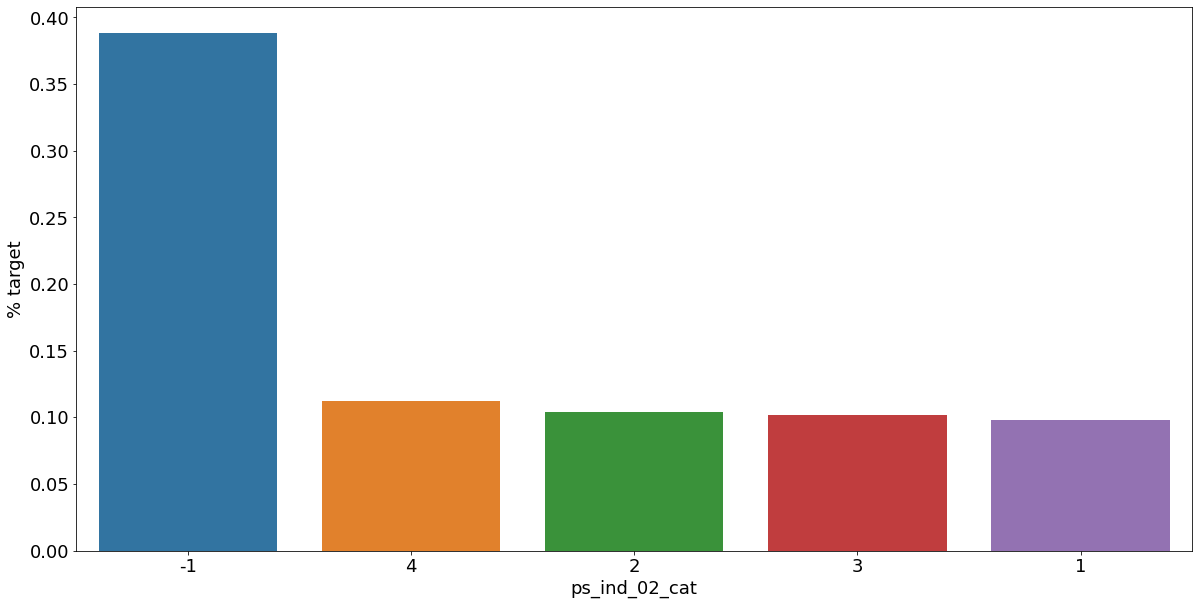

<Figure size 432x288 with 0 Axes>

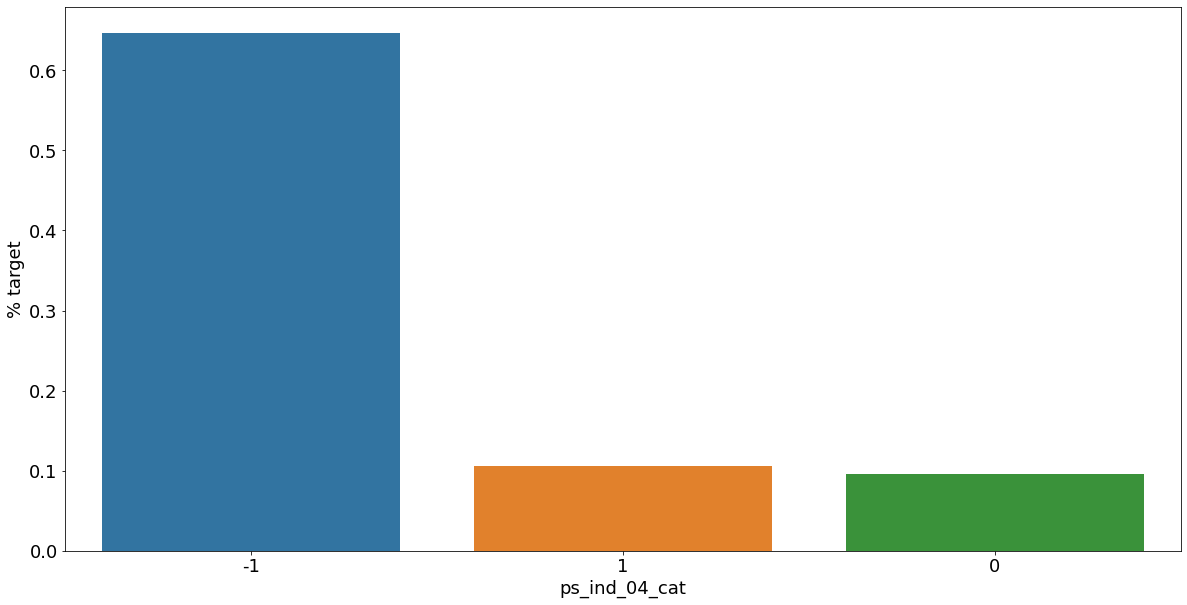

<Figure size 432x288 with 0 Axes>

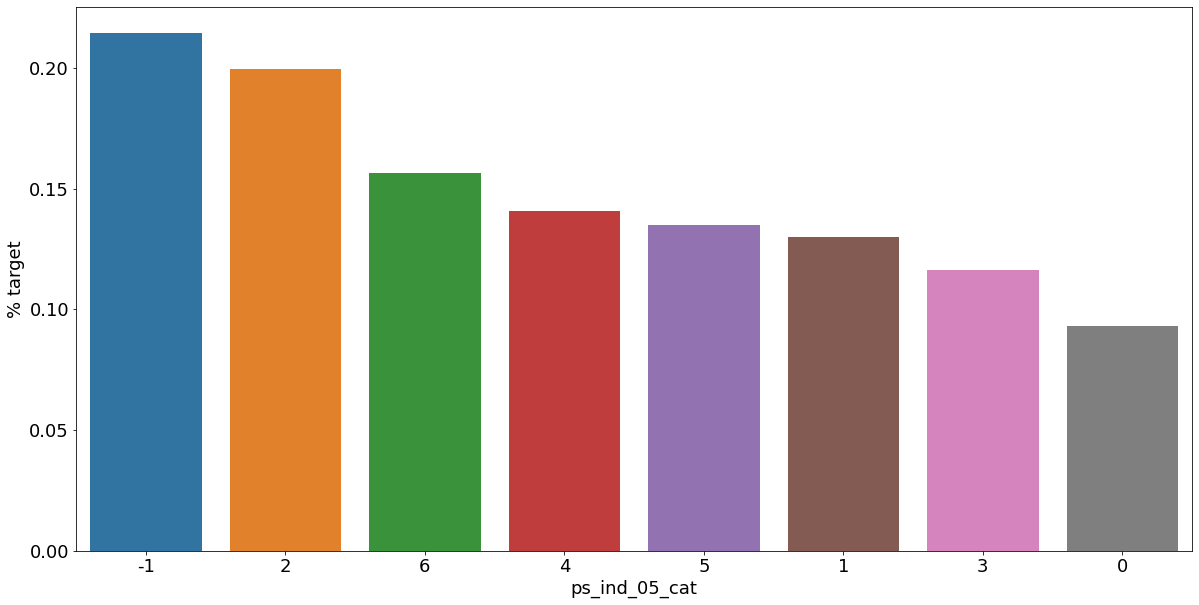

<Figure size 432x288 with 0 Axes>

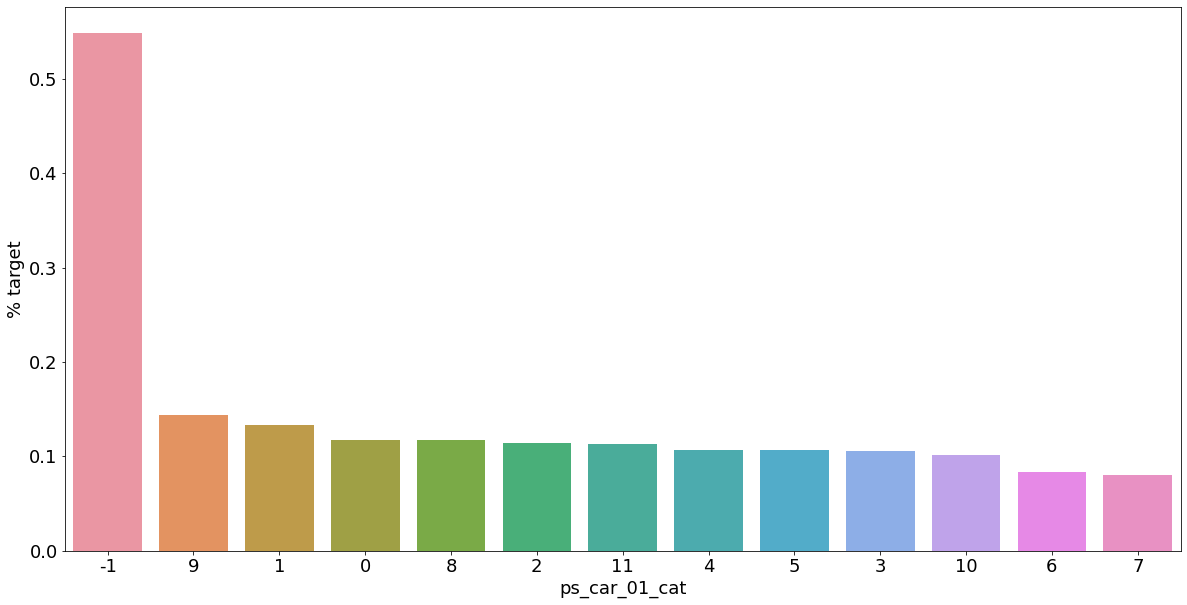

<Figure size 432x288 with 0 Axes>

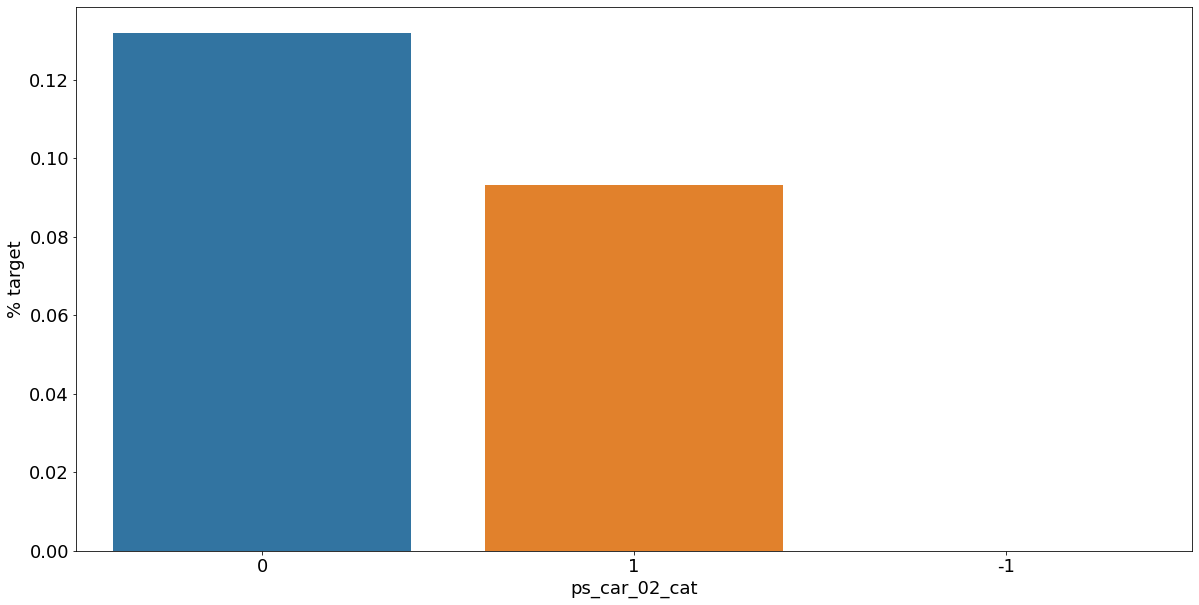

<Figure size 432x288 with 0 Axes>

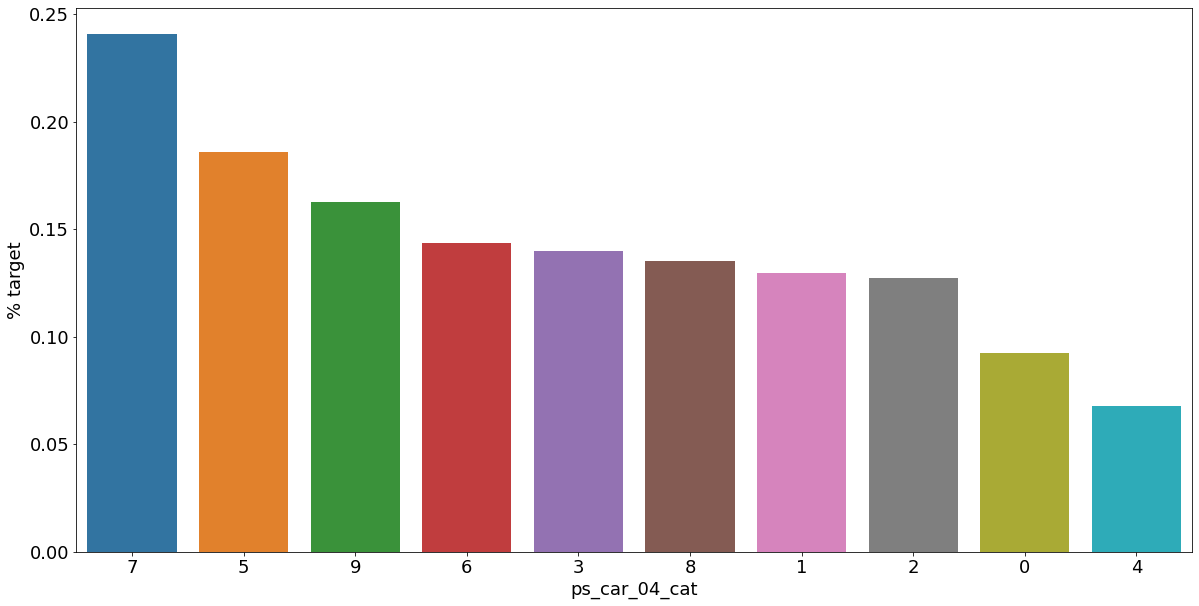

<Figure size 432x288 with 0 Axes>

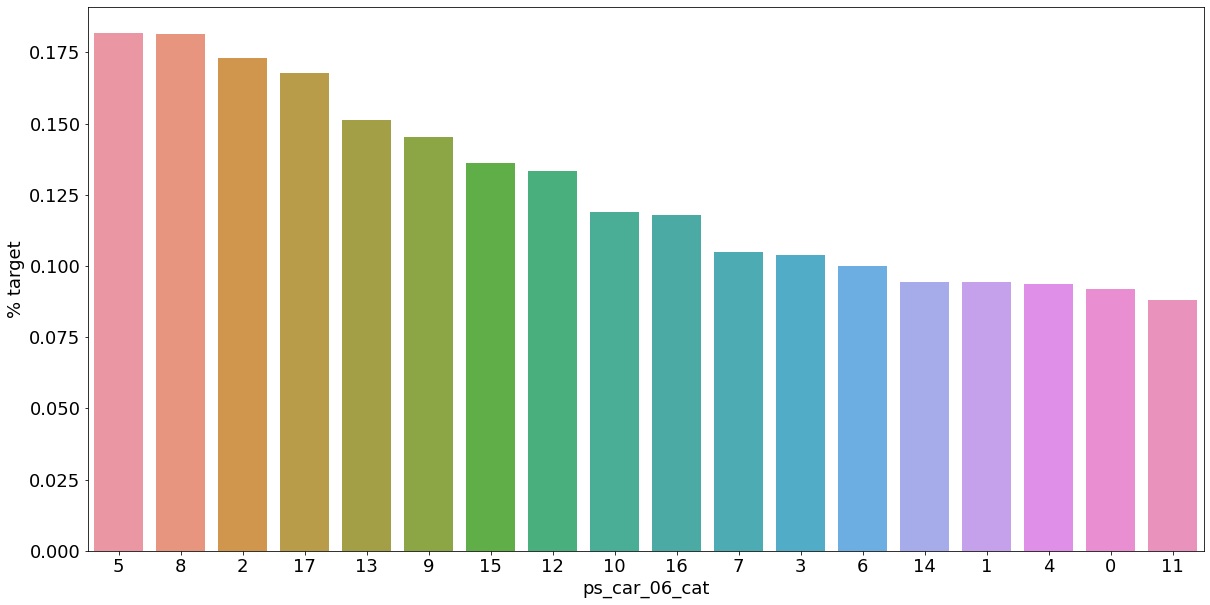

<Figure size 432x288 with 0 Axes>

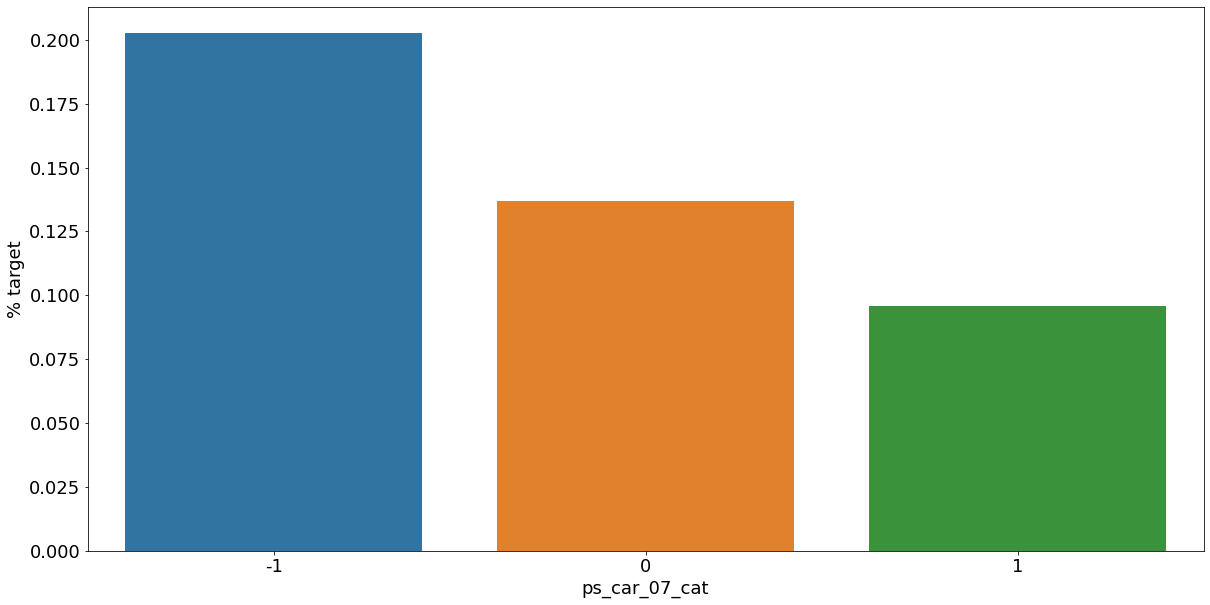

<Figure size 432x288 with 0 Axes>

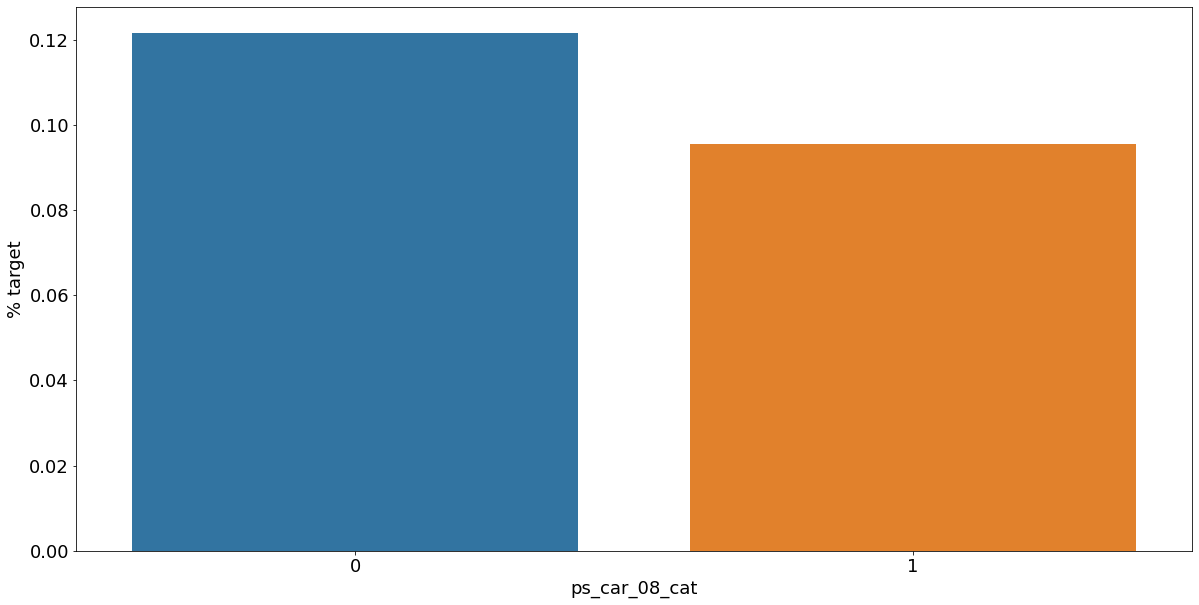

<Figure size 432x288 with 0 Axes>

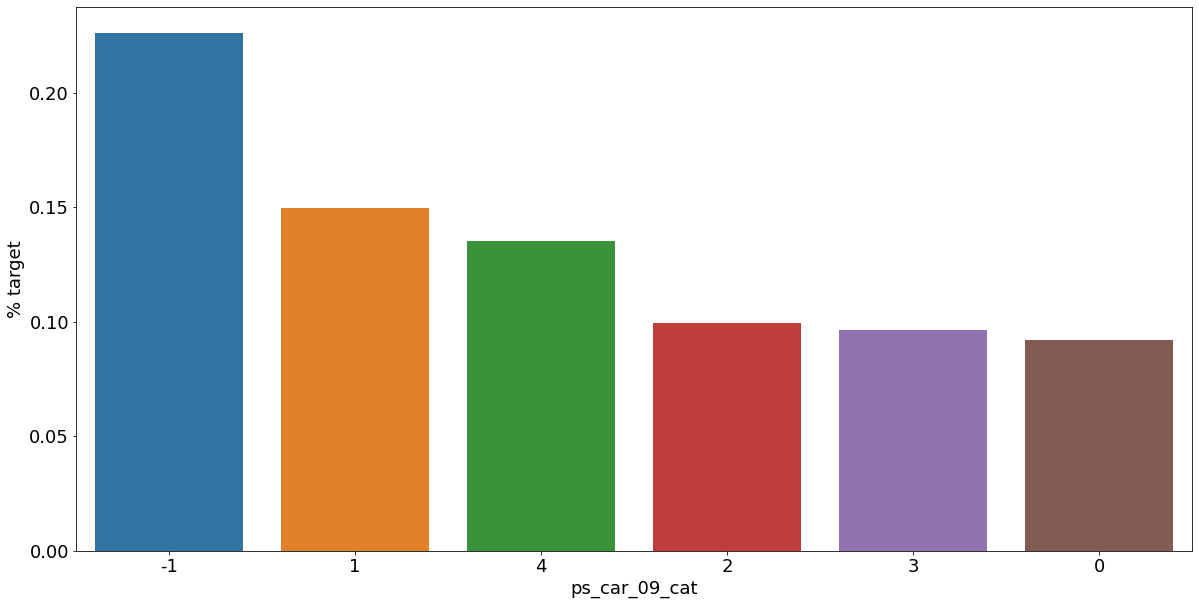

<Figure size 432x288 with 0 Axes>

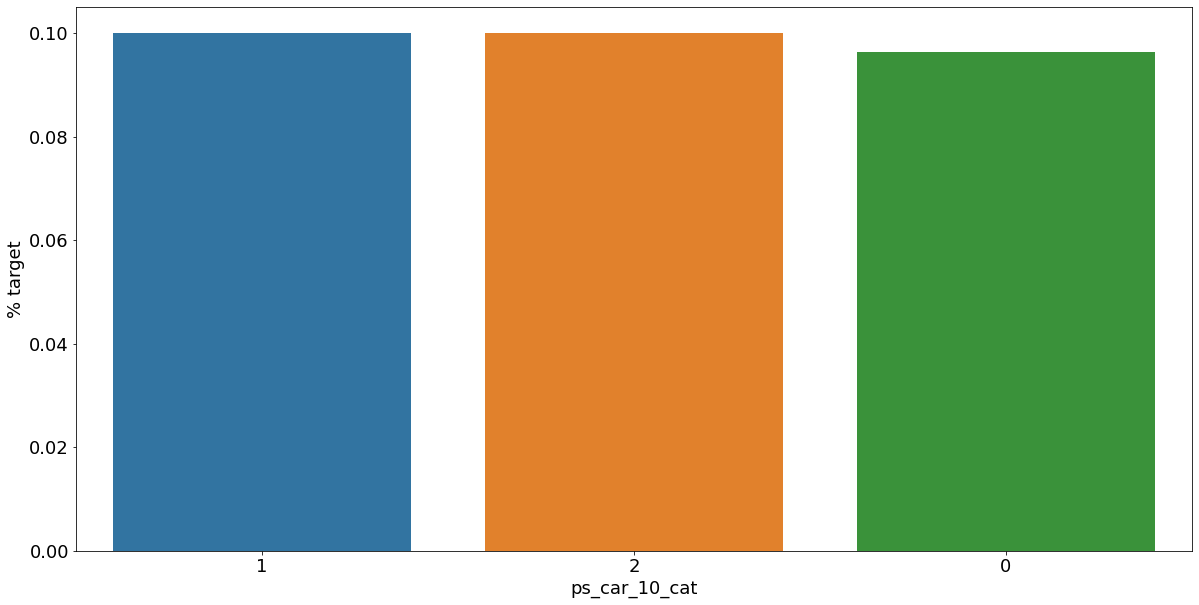

In [ ]:
v  = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  plt.figure()
  fig, ax = plt.subplots(figsize=(20, 10))
  # Calculate the perceentage of target=1 per category value

  cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
  cat_perc.sort_values(by='target', ascending=False, inplace=True)

  # Bar plot
  # Order the bars descending on target mean
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

누락된 값이 있는 변수에서 알 수 있듯이 누락된 값을 예를 들어 모드로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 누락된 값이 있는 고객은 보험 청구를 요청할 가능성이 훨씬 더 높은(어떤 경우에는 훨씬 더 낮음) 것으로 보입니다.

간격 변수
간격 변수 간의 상관 관계를 확인합니다. 히트맵은 변수 간의 상관 관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예제를 기반으로 합니다.

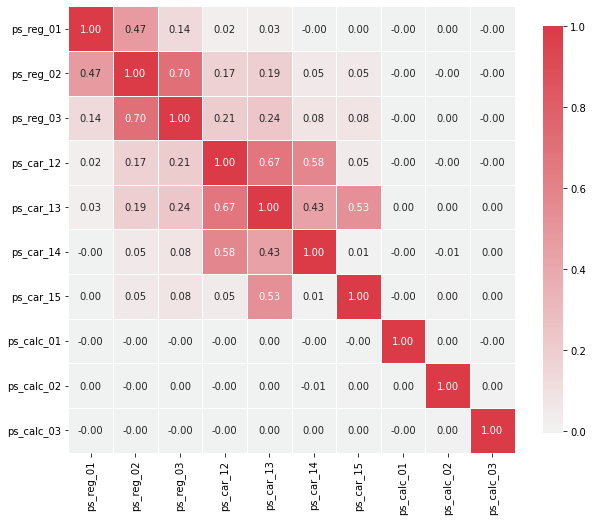

In [ ]:
def corr_heatmap(v):
  correlations = train[v].corr()

  # create color map ranging between two colors
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
              square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
  plt.show()

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 사이에는 강한 상관관계가 있습니다.

ps_reg_02 및 ps_reg_03(0.7)
ps_car_12 및 ps_car13(0.67)
ps_car_12 및 ps_car14(0.58)
ps_car_13 및 ps_car15(0.67)
Seaborn에는 변수 간의 (선형) 관계를 시각화하는 편리한 플롯이 있습니다. pairplot을 사용하여 변수 간의 관계를 시각화할 수 있습니다. 그러나 히트맵에는 이미 제한된 수의 상관 관계 변수가 표시되어 있으므로 상관 관계가 높은 각 변수를 개별적으로 살펴보겠습니다.
참고: 프로세스 속도를 높이기 위해 기차 데이터 샘플을 가져옵니다.

In [ ]:
s = train.sample(frac=0.1)

ps_reg_02 및 ps_reg_03
회귀선에서 알 수 있듯이 이러한 변수 사이에는 선형 관계가 있습니다. 색조 매개변수 덕분에 target=0 및 target=1에 대한 회귀선이 동일함을 알 수 있습니다.

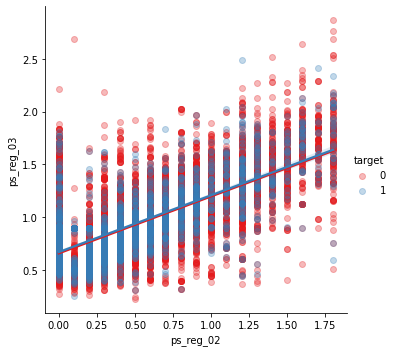

In [ ]:
sns.lmplot(x='ps_reg_02', 
           y='ps_reg_03',
           data=s,
           hue='target',
           palette='Set1',
           scatter_kws={'alpha' : 0.3})
plt.show()

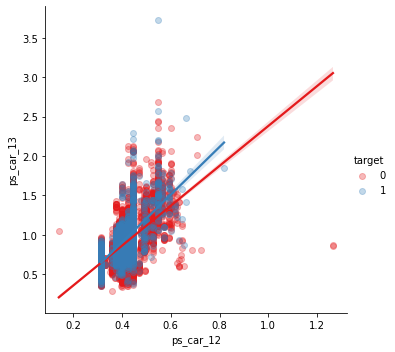

In [ ]:
# ps_car_12 and ps_car_13

sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

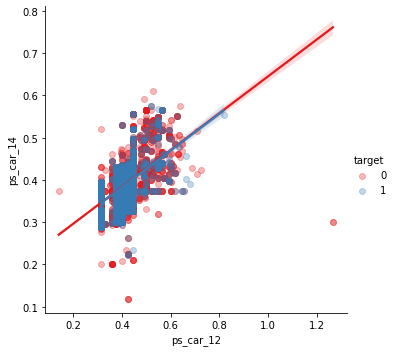

In [ ]:
# ps_car_12 and ps_car_14
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

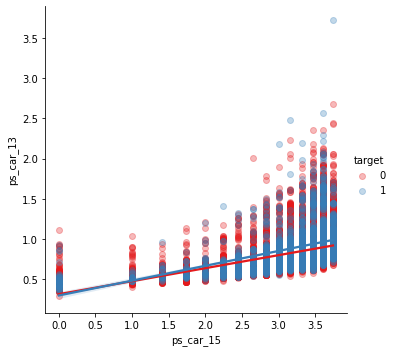

In [ ]:
# ps_car_13 and ps_car_15

sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

좋아요, 이제 어떻게 하죠? 유지할 상관 변수를 어떻게 결정할 수 있습니까? 차원을 줄이기 위해 변수에 대한 주성분 분석(PCA)을 수행할 수 있습니다. AllState Claims Severity Competition에서 저는 이 커널을 그렇게 만들었습니다. 그러나 상관 변수의 수가 다소 적기 때문에 모델이 무거운 작업을 수행하도록 할 것입니다.

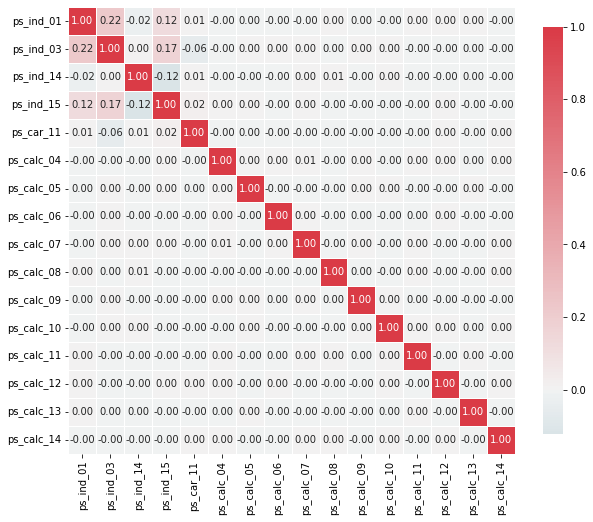

In [ ]:
# Checking the correlations between ordinal variables

v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

서수 변수의 경우 많은 상관 관계가 표시되지 않습니다. 반면에 대상 값으로 그룹화할 때 분포가 어떻게 되는지 확인할 수 있습니다.

# Feature engineering
- 더미 변수 만들기 : 
범주형 변수의 값은 순서나 크기를 나타내지 않습니다. 예를 들어 범주 2는 범주 1 값의 두 배가 아닙니다. 따라서 이를 처리하기 위해 더미 변수를 만들 수 있습니다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제합니다.

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Befor dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Befor dummification we have 57 variables in train
After dummification we have 109 variables in train


따라서 더미 변수를 생성하면 훈련 세트에 52개의 변수가 추가됩니다.

In [ ]:
# Creating interaction variables

v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# 이전 코드
# interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns = poly.get_feature_names(v))

# 수정 코드
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns = poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True) # Remove the original columns

#concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


이렇게 하면 훈련 데이터에 추가 상호 작용 변수가 추가됩니다. get_feature_names 메서드 덕분에 이러한 새 변수에 열 이름을 할당할 수 있습니다.

# Feature selection

분산이 낮거나 0인 기능 제거
개인적으로 나는 분류기 알고리즘이 유지할 기능을 선택하도록 하는 것을 선호합니다. 하지만 우리가 스스로 할 수 있는 일이 하나 있습니다. 분산이 없거나 매우 낮은 특성을 제거하는 것입니다. Sklearn에는 VarianceThreshold라는 편리한 방법이 있습니다. 기본적으로 분산이 0인 기능을 제거합니다. 이전 단계에서 분산이 0인 변수가 없음을 확인했기 때문에 이 대회에는 적용되지 않습니다. 그러나 분산이 1% 미만인 기능을 제거하면 31개의 변수가 제거됩니다.

In [ ]:
selector = VarianceThreshold(threshold = .01)

# Fit to train without id and target variables
selector.fit(train.drop(['id', 'target'], axis=1))

# Function to toggle boolean array elements
f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산을 기준으로 선택하면 오히려 많은 변수를 잃게 됩니다. 하지만 변수가 많지 않기 때문에 분류자가 선택하도록 하겠습니다. 더 많은 변수가 있는 데이터 세트의 경우 처리 시간을 줄일 수 있습니다.

Sklearn은 또한 다른 기능 선택 방법과 함께 제공됩니다. 이러한 메서드 중 하나는 다른 분류자가 최상의 기능을 선택하고 이를 계속 사용하도록 하는 SelectFromModel입니다. 아래에서 Random Forest를 사용하여 이를 수행하는 방법을 보여 드리겠습니다.

# Selecting features with a Random Forest and SelectFromModel
- 여기서는 랜덤 포레스트의 기능 중요도에 따라 기능 선택을 기반으로 합니다. Sklearn의 SelectFromModel을 사용하면 유지하려는 변수 수를 지정할 수 있습니다. 기능 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 그러나 우리는 단순히 상위 50% 최고의 변수를 선택합니다.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000,
                            random_state=0,
                            n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

KeyboardInterrupt: ignored

SelectFromModel을 사용하면 사용할 프리핏 분류기와 기능 중요도에 대한 임계값을 지정할 수 있습니다. get_support 메서드를 사용하면 기차 데이터의 변수 수를 제한할 수 있습니다.

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features befor selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

In [ ]:
train = train[selected_vars + ['target']]

# Feature scaling
앞에서 언급했듯이 훈련 데이터에 표준 스케일링을 적용할 수 있습니다. 일부 분류기는 이 작업을 수행할 때 더 잘 수행됩니다.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))